# Hopfield Network

Τα δίκτυα Hopfield εισήχθησαν το 1982 από τον John Hopfield.

Τα δίχτυα Hopfield χρησιμοποιούνται κυρίως ως συσχετιστικές μνήμες και για την επίλυση προβλημάτων βελτιστοποίησης. Χαρακτηριστική λειτουργία αυτών των μηχανών είναι συνειρμική μνήμη, όπου συνδέει σχετικές έννοιες ανά συσχετισμό. Για παράδειγμα, όταν ακούτε ή βλέπετε μια εικόνα του Πύργου του Άιφελ, μπορεί να θυμάστε ότι βρίσκεται στο Παρίσι.

Οι είσοδοι και οι έξοδοι του δικτύου Hopfield είναι δυαδικές, επομένως μπορούμε να το εκπαιδεύσουμε ώστε να θυμάται ασπρόμαυρες εικόνες, όπως μια συλλογή γραμμάτων. Στις ασπρόμαυρες εικόνες λοιπόν θα μπορούσαμε να βασιστούμε σε ένα μοτίβο μέσω της ανάκλησής του. Η διαδικασία ανάκλησης σε αυτή την περίπτωση είναι επαναληπτική και σε κάθε κύκλο πυροδοτούνται όλοι οι νευρώνες στο δίκτυο. Αυτή η διαδικασία τελειώνει όταν η κατάσταση των νευρώνων δεν αλλάξει.

Παρατίθεται διάγραμμα ενός δικτύου Hopfield με πεντε νευρώνες με βρόγχους ανάδρασης

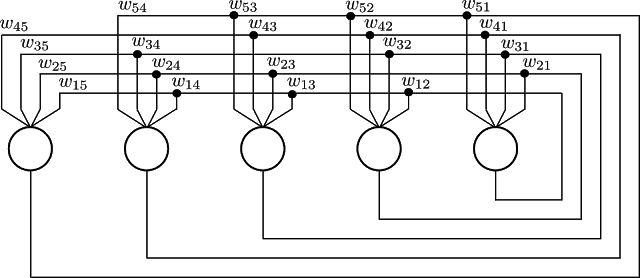



**Ερώτηση 1η**: Σε τι προβλήματα θα μπορούσαν να χρησιμοποιηθούν τα δίκτυα Hopfield;

**Ερώτηση 2η**: να αναφέρετε επιγραμματικά τα πλεονεκτήματα και τα μεινονεκτήματα των δικτύων Hopfield;

**Ερώτηση 3η**: να αναφέρετε επιγραμματικά τον τρόπο λειτουργίας των δικτύων Hopfield

Παρακάτω παρατίθεται ένα μικρό πρόγραμμα που εκπαιδεύεται για τα 4 γράμματα (D,J,C,M)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def plotLetter(letter):        
    black = '#000000'; white='#FFFFFF'; gray='#AAAAAA'
    squareSide = 0.03
    
    plt.figure(figsize=(5,5))    
    ax = plt.axes([0,0,6.5,6.5])

    # Plotting squares
    for i in range(25):
        coords = np.array([i%5*squareSide, (4-i/5)*squareSide])
        color = black if letter[i]< 0 else white
        square = mpatches.Rectangle(coords, squareSide, squareSide, 
                                                      color = color, linewidth=0.5)
        ax.add_patch(square)
    
    # Plotting grid
    for i in range(6):
        x = (5-i%5)*squareSide
        s1, s2 = np.array([[x, x], [0, 5*squareSide]])
        ax.add_line(mlines.Line2D(s1, s2, lw=1, color = gray ))
        ax.add_line(mlines.Line2D(s2, s1, lw=1, color = gray ))

patterns = np.array([
   [-1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1.],   # Letter D
   [-1,-1,-1,-1,-1,1,1,1,-1,1,1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1,1.],    # Letter J
   [1,-1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,-1,-1,-1,-1.],     # Letter C
   [-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1.],], # Letter M 
   dtype=float)

n = patterns.shape[0]
m = patterns.shape[1]
eta = 1./n

# training
weights = np.zeros((m,m))
for i in range(m-1):
    for j in range(i+1,m):
        weights[i,j] = eta*np.dot(patterns[:,i], patterns[:,j])
        weights[j,i] = weights[i,j]     

activations = np.zeros(m)
states = np.array([1,1,1,1,-1,1,-1,1,1,-1,1,1,-1,1,1,1,1,1,1,-1,-1,1,1,1,1], 
                   dtype=float)
plotLetter(states)

# recalling
np.random.seed(10)
for itr in range(4): 
    for i in np.random.permutation(m): # asynchronous activation
        activations[i] = np.dot(weights[i,:], states)
        states[i]=np.tanh(activations[i])
    plotLetter(states)
plt.show()

Δοκιμάστε να τρέξετε τον κώδικα και με τα παρακάτω ζέυγη στο states

[-1,-1,-1,1,1,1,1,1,1,1,-1,1,-1,1,1,1,1,1,1,1,1,1,1,-1,1]

[-1,-1,-1,-1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,1,1,-1,-1,-1,1,1,-1,1]

**Ερώτηση 4η**: Τι παρατηρείτε ως προς το αποτέλεσμα; Κατάφερε να σταματήσει σε κάποιο γράμμα από αυτά που θυμόταν το μοντέλο; Θα μπορούσε να γίνει κάποια αλλαγή σε επίπεδο εκπαίδευσης ώστε να είχαμε καλύτερα αποτελέσματα;